In [3]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorboard as tb
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [6]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save(filepath="../SpeechER/models/model1.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 81, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                      

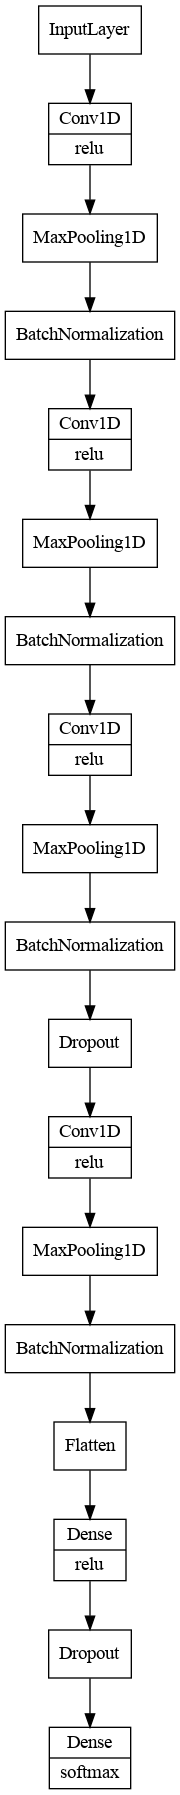

In [7]:
plot_model(model, "../SpeechER/figs/m1arc.png", show_layer_names=False, show_layer_activations=True)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model1_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)
logdir="../SpeechER/logs/model1"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint, tensorboard_callback])

Epoch 1/100
214/214 [==============================] - ETA: 0s - loss: 1.7387 - accuracy: 0.3127

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 27s 118ms/step - loss: 1.7387 - accuracy: 0.3127 - val_loss: 3.3571 - val_accuracy: 0.1590
Epoch 2/100
214/214 [==============================] - ETA: 0s - loss: 1.4688 - accuracy: 0.4163

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 27s 125ms/step - loss: 1.4688 - accuracy: 0.4163 - val_loss: 3.3496 - val_accuracy: 0.1994
Epoch 3/100
214/214 [==============================] - ETA: 0s - loss: 1.3544 - accuracy: 0.4582

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 117ms/step - loss: 1.3544 - accuracy: 0.4582 - val_loss: 2.0673 - val_accuracy: 0.2799
Epoch 4/100
214/214 [==============================] - ETA: 0s - loss: 1.2967 - accuracy: 0.4804

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 27s 126ms/step - loss: 1.2967 - accuracy: 0.4804 - val_loss: 1.3135 - val_accuracy: 0.4631
Epoch 5/100
214/214 [==============================] - ETA: 0s - loss: 1.2573 - accuracy: 0.4952

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 27s 124ms/step - loss: 1.2573 - accuracy: 0.4952 - val_loss: 1.2926 - val_accuracy: 0.4737
Epoch 6/100
214/214 [==============================] - 24s 114ms/step - loss: 1.2290 - accuracy: 0.5046 - val_loss: 1.3220 - val_accuracy: 0.4696
Epoch 7/100
214/214 [==============================] - ETA: 0s - loss: 1.1999 - accuracy: 0.5150

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 117ms/step - loss: 1.1999 - accuracy: 0.5150 - val_loss: 1.2347 - val_accuracy: 0.5052
Epoch 8/100
214/214 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.5270

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 119ms/step - loss: 1.1738 - accuracy: 0.5270 - val_loss: 1.2197 - val_accuracy: 0.5144
Epoch 9/100
214/214 [==============================] - 24s 113ms/step - loss: 1.1591 - accuracy: 0.5345 - val_loss: 1.3226 - val_accuracy: 0.4495
Epoch 10/100
214/214 [==============================] - ETA: 0s - loss: 1.1438 - accuracy: 0.5412

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 119ms/step - loss: 1.1438 - accuracy: 0.5412 - val_loss: 1.1554 - val_accuracy: 0.5333
Epoch 11/100
214/214 [==============================] - 25s 116ms/step - loss: 1.1268 - accuracy: 0.5471 - val_loss: 1.2428 - val_accuracy: 0.5201
Epoch 12/100
214/214 [==============================] - ETA: 0s - loss: 1.1101 - accuracy: 0.5531

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 119ms/step - loss: 1.1101 - accuracy: 0.5531 - val_loss: 1.1160 - val_accuracy: 0.5474
Epoch 13/100
214/214 [==============================] - ETA: 0s - loss: 1.0886 - accuracy: 0.5624

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 118ms/step - loss: 1.0886 - accuracy: 0.5624 - val_loss: 1.1103 - val_accuracy: 0.5595
Epoch 14/100
214/214 [==============================] - 24s 112ms/step - loss: 1.0759 - accuracy: 0.5692 - val_loss: 1.2191 - val_accuracy: 0.5232
Epoch 15/100
214/214 [==============================] - 24s 110ms/step - loss: 1.0579 - accuracy: 0.5746 - val_loss: 1.1764 - val_accuracy: 0.5208
Epoch 16/100
214/214 [==============================] - 24s 114ms/step - loss: 1.0504 - accuracy: 0.5822 - val_loss: 1.1125 - val_accuracy: 0.5565
Epoch 17/100
214/214 [==============================] - ETA: 0s - loss: 1.0342 - accuracy: 0.5870

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 26s 120ms/step - loss: 1.0342 - accuracy: 0.5870 - val_loss: 1.0754 - val_accuracy: 0.5811
Epoch 18/100
214/214 [==============================] - 25s 117ms/step - loss: 1.0162 - accuracy: 0.5960 - val_loss: 1.1151 - val_accuracy: 0.5615
Epoch 19/100
214/214 [==============================] - 24s 113ms/step - loss: 1.0074 - accuracy: 0.6025 - val_loss: 1.1145 - val_accuracy: 0.5690
Epoch 20/100
214/214 [==============================] - 24s 113ms/step - loss: 0.9847 - accuracy: 0.6062 - val_loss: 1.1204 - val_accuracy: 0.5629
Epoch 21/100
214/214 [==============================] - 24s 112ms/step - loss: 0.9731 - accuracy: 0.6120 - val_loss: 1.1139 - val_accuracy: 0.5698
Epoch 22/100
214/214 [==============================] - 25s 116ms/step - loss: 0.9533 - accuracy: 0.6219 - val_loss: 1.1081 - val_accuracy: 0.5734
Epoch 23/100
214/214 [==============================] - 24s 113ms/step - loss: 0.9408 - accuracy: 0.6272 - val_loss: 1.2856 - val_a

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 115ms/step - loss: 0.8961 - accuracy: 0.6491 - val_loss: 1.0747 - val_accuracy: 0.5909
Epoch 27/100
214/214 [==============================] - 24s 110ms/step - loss: 0.8760 - accuracy: 0.6563 - val_loss: 1.2350 - val_accuracy: 0.5415
Epoch 28/100
214/214 [==============================] - ETA: 0s - loss: 0.8634 - accuracy: 0.6627

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model1_best/assets


214/214 [==============================] - 25s 116ms/step - loss: 0.8634 - accuracy: 0.6627 - val_loss: 1.0407 - val_accuracy: 0.6004
Epoch 29/100
214/214 [==============================] - 24s 111ms/step - loss: 0.8518 - accuracy: 0.6681 - val_loss: 1.2058 - val_accuracy: 0.5583
Epoch 30/100
214/214 [==============================] - 26s 121ms/step - loss: 0.8278 - accuracy: 0.6733 - val_loss: 1.1685 - val_accuracy: 0.5675
Epoch 31/100
214/214 [==============================] - 24s 112ms/step - loss: 0.8115 - accuracy: 0.6831 - val_loss: 1.0998 - val_accuracy: 0.5947
Epoch 32/100
214/214 [==============================] - 24s 111ms/step - loss: 0.8024 - accuracy: 0.6867 - val_loss: 1.1243 - val_accuracy: 0.5847
Epoch 33/100
214/214 [==============================] - 24s 110ms/step - loss: 0.7859 - accuracy: 0.6946 - val_loss: 1.1175 - val_accuracy: 0.5910
Epoch 34/100
214/214 [==============================] - 24s 113ms/step - loss: 0.7709 - accuracy: 0.7008 - val_loss: 1.2461 - val_a

In [9]:
eval = model.evaluate(X_test, y_test)

 54/286 [====>.........................] - ETA: 0s - loss: 1.1169 - accuracy: 0.6302

2023-06-04 09:23:00.649841: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1401552896 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 12582912/4100456448
2023-06-04 09:23:00.649872: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1697644544
InUse:                        57847040
MaxInUse:                    396261212
NumAllocs:                     2332399
MaxAllocSize:                231374848
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 09:23:00.649882: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 09:23:00.649886: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

286/286 [==============================] - 1s 3ms/step - loss: 1.1871 - accuracy: 0.6172


2023-06-04 09:23:01.513111: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1142030336 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 12582912/4100456448
2023-06-04 09:23:01.513151: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1697644544
InUse:                        55326816
MaxInUse:                    396261212
NumAllocs:                     2350679
MaxAllocSize:                287314944
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 09:23:01.513162: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 09:23:01.513166: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

In [10]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [11]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 2ms/step


,Predicted Labels,Actual Labels
0,disgust,disgust
1,sad,sad
2,neutral,happy
3,happy,disgust
4,happy,happy
5,calm,calm
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,neutral,sad


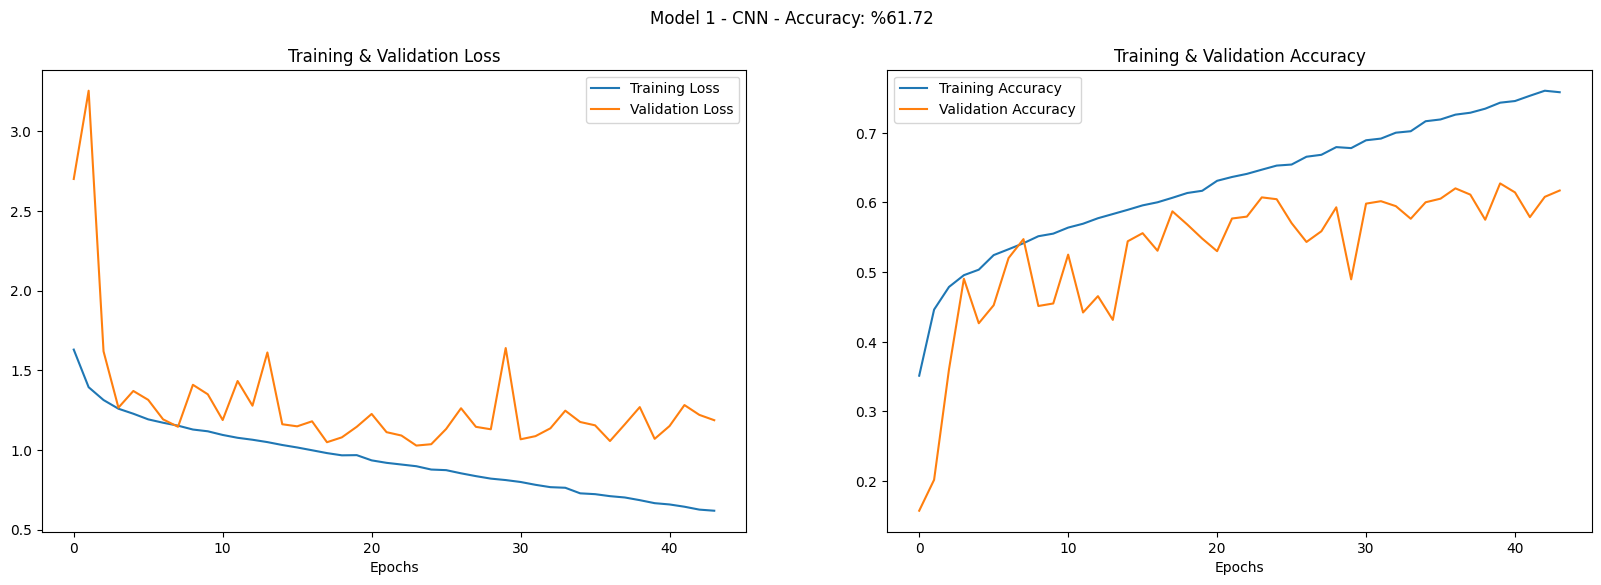

In [12]:
epochs = [i for i in range(stop_early.stopped_epoch + 1)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 1 - CNN - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model1.png")

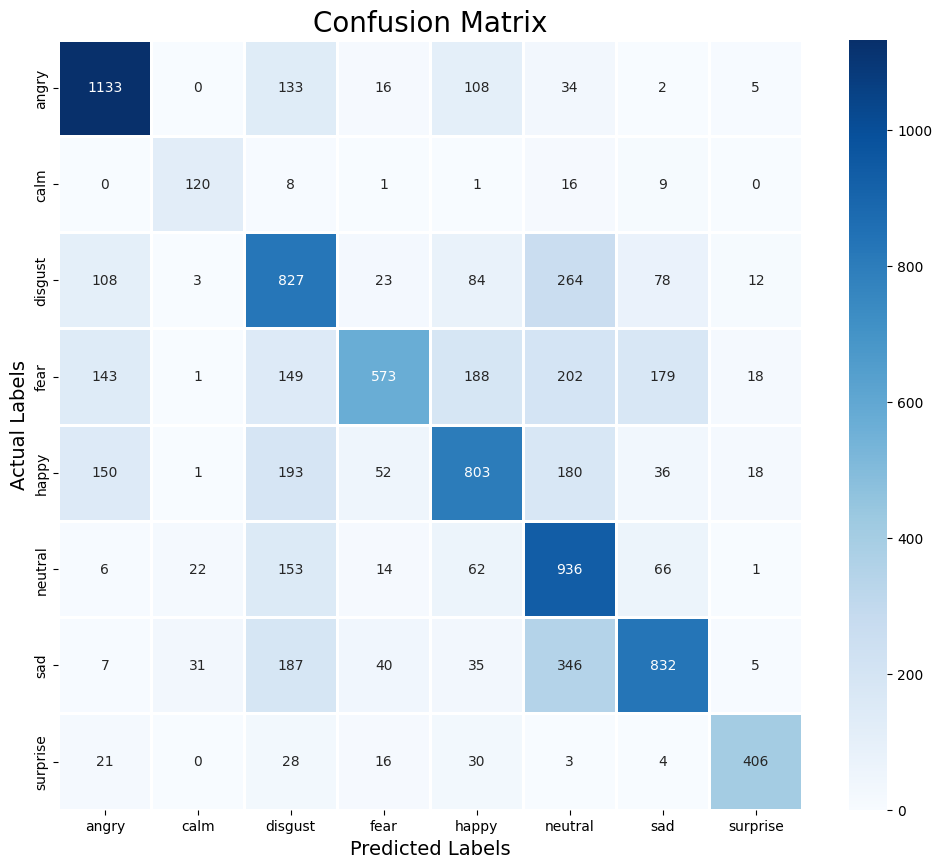

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.72      0.79      0.76      1431
        calm       0.67      0.77      0.72       155
     disgust       0.49      0.59      0.54      1399
        fear       0.78      0.39      0.52      1453
       happy       0.61      0.56      0.59      1433
     neutral       0.47      0.74      0.58      1260
         sad       0.69      0.56      0.62      1483
    surprise       0.87      0.80      0.83       508

    accuracy                           0.62      9122
   macro avg       0.66      0.65      0.64      9122
weighted avg       0.65      0.62      0.62      9122

